In [1]:
!pip install xgboost


In [2]:
# Import semua library yang dibutuhkan
#Untuk Data
import numpy as np
import pandas as pd

#untuk Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

#Untuk kebutuhan proyek machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import OneHotEncoder, StandardScaler, KBinsDiscretizer, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from collections import Counter
from yellowbrick.cluster import KElbowVisualizer
#Untuk ekspor data dan penyimpanan model
import joblib


In [3]:
#Loading data dan Menampilkan data pada 5 baris pertama
df = pd.read_csv("Dataset_pertanian_dengan_pupuk.csv")
df.head()

,Province,District,Year,Commodity,Rain_mm,Temp_C,Humidity_pct,Soil_pH,Soil_N_index,Soil_P_index,...,Target_Yield_KgHa,Production_KgHa,InputPrice_Urea_RpKg,InputPrice_SP36_RpKg,InputPrice_KCl_RpKg,Init_Capital_RpHa,Maintenance_Cost_RpHa,Pupuk_Urea_kgHa,Pupuk_SP36_kgHa,Pupuk_KCl_kgHa
0,Papua Barat Daya,Sorong Selatan,2020,Tebu,2248.4,26.6,85.4,4.25,3,1,...,68850.5,64746.9,7373,8304,12439,7514080,9517829,238.2,131.6,88.6
1,Sulawesi Utara,Manado,2023,Tebu,2118.8,28.2,74.7,4.80,2,1,...,58770.4,59313.4,7607,8503,11352,6923743,10322411,257.2,86.1,86.1
2,Gorontalo,Bone Bolango,2023,Padi,2561.7,26.2,90.0,5.01,3,2,...,5856.1,5279.4,7119,7209,12417,4106027,5578082,289.4,95.7,75.4
3,Sulawesi Barat,Mamasa,2019,Cabai Rawit,1956.5,28.4,75.7,5.68,1,2,...,10280.5,9704.8,5893,8685,11806,6117664,10014848,237.5,111.4,70.2
4,Kalimantan Timur,Paser,2024,Tebu,2600.9,28.5,78.1,5.12,3,3,...,71133.0,72259.5,6122,9587,9650,5721647,10051852,292.2,124.7,78.9


In [4]:
# Menampilkan jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Province               50000 non-null  object 
 1   District               50000 non-null  object 
 2   Year                   50000 non-null  int64  
 3   Commodity              50000 non-null  object 
 4   Rain_mm                50000 non-null  float64
 5   Temp_C                 50000 non-null  float64
 6   Humidity_pct           50000 non-null  float64
 7   Soil_pH                50000 non-null  float64
 8   Soil_N_index           50000 non-null  int64  
 9   Soil_P_index           50000 non-null  int64  
 10  Soil_K_index           50000 non-null  int64  
 11  Area_Ha                50000 non-null  float64
 12  Prev_Yield_KgHa        50000 non-null  float64
 13  Target_Yield_KgHa      50000 non-null  float64
 14  Production_KgHa        50000 non-null  float64
 15  In

In [5]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe(include="all")

,Province,District,Year,Commodity,Rain_mm,Temp_C,Humidity_pct,Soil_pH,Soil_N_index,Soil_P_index,...,Target_Yield_KgHa,Production_KgHa,InputPrice_Urea_RpKg,InputPrice_SP36_RpKg,InputPrice_KCl_RpKg,Init_Capital_RpHa,Maintenance_Cost_RpHa,Pupuk_Urea_kgHa,Pupuk_SP36_kgHa,Pupuk_KCl_kgHa
count,50000,50000,50000.000000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,5.000000e+04,50000.000000,50000.000000,50000.000000
unique,38,237,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Sulawesi Selatan,Sorong,NaN,Padi,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1381,454,NaN,10133,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2021.513140,NaN,2167.413294,27.201364,83.451516,5.509435,2.521020,2.522380,...,21132.996623,21035.962470,6380.016840,8465.387480,11064.710620,5.413161e+06,8.115947e+06,249.950126,119.948826,80.059074
std,NaN,NaN,2.287569,NaN,542.308400,1.141049,6.588732,0.654364,0.985625,0.985332,...,27483.357356,27447.926211,757.908858,1021.391293,1306.206627,1.431424e+06,2.054228e+06,20.003889,14.871953,10.060322
min,NaN,NaN,2018.000000,NaN,437.500000,22.100000,55.000000,4.200000,1.000000,1.000000,...,3200.000000,1850.400000,4401.000000,6001.000000,8007.000000,2.683850e+06,4.374387e+06,162.700000,80.000000,50.000000
25%,NaN,NaN,2020.000000,NaN,1784.000000,26.400000,79.500000,5.050000,2.000000,2.000000,...,6269.925000,6228.100000,5827.000000,7678.750000,10014.000000,4.011434e+06,5.933454e+06,236.500000,109.900000,73.200000
50%,NaN,NaN,2022.000000,NaN,2150.900000,27.200000,84.000000,5.500000,3.000000,2.000000,...,8442.150000,8431.800000,6375.000000,8462.000000,11054.000000,5.654386e+06,8.781869e+06,250.000000,119.900000,80.100000
75%,NaN,NaN,2024.000000,NaN,2541.300000,27.900000,88.000000,5.950000,3.000000,3.000000,...,12232.550000,12260.550000,6928.000000,9245.000000,12104.000000,6.626454e+06,9.852271e+06,263.400000,129.900000,86.900000


In [6]:
# Mengecek dataset menggunakan isnull().sum()
missing_values = df.isnull().sum()
missing_values [missing_values > 0]

,0


In [7]:
# Mengecek dataset menggunakan duplicated().sum()
jumlah_duplikat = df.duplicated().sum()
print("Jumlah data duplikat:", jumlah_duplikat)

Jumlah data duplikat: 0


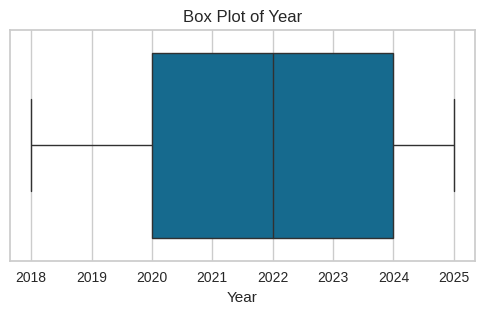

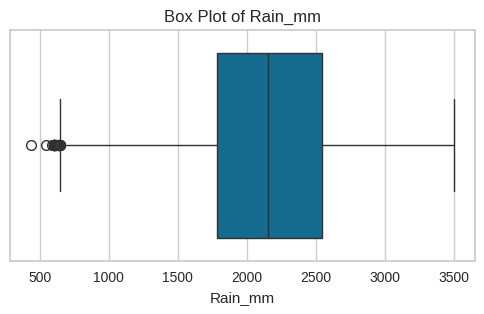

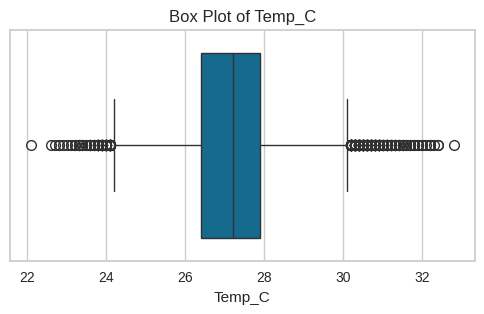

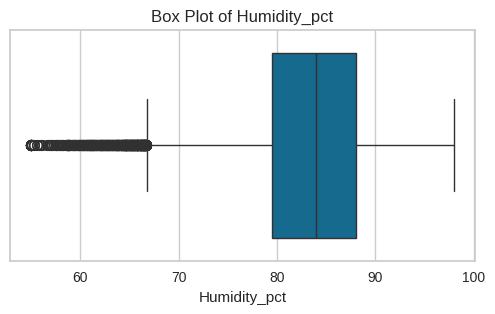

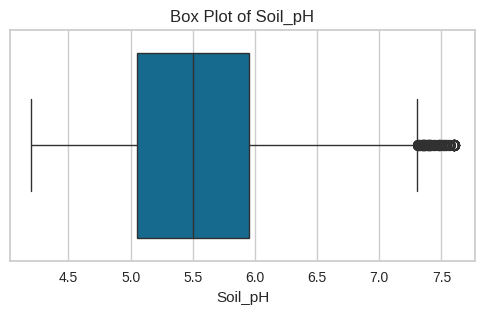

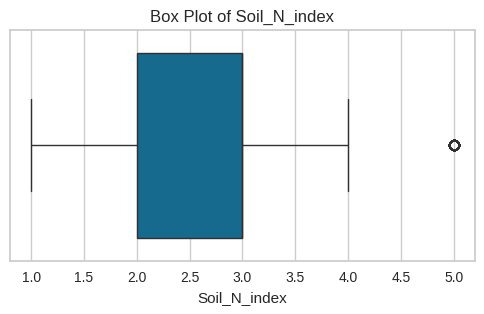

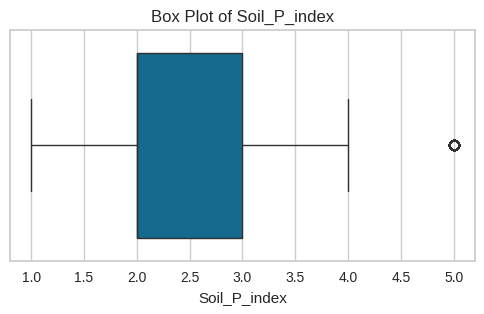

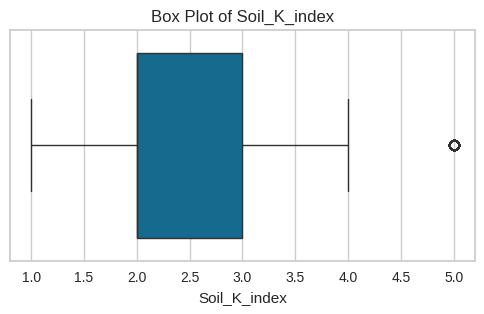

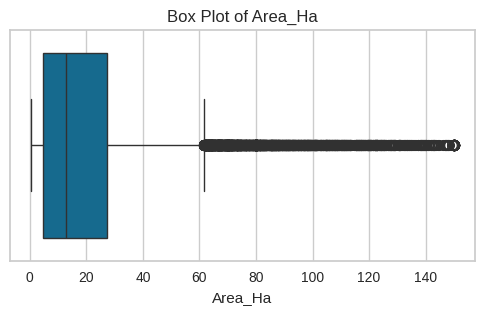

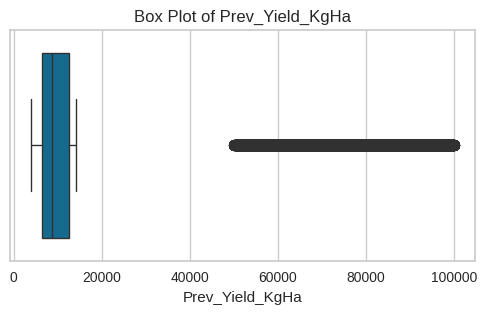

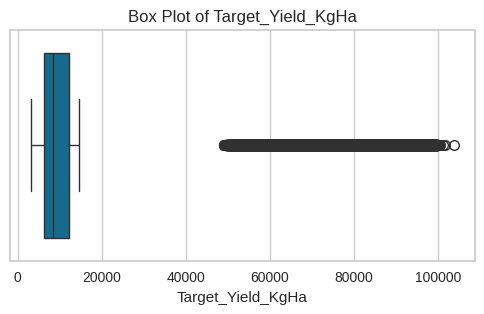

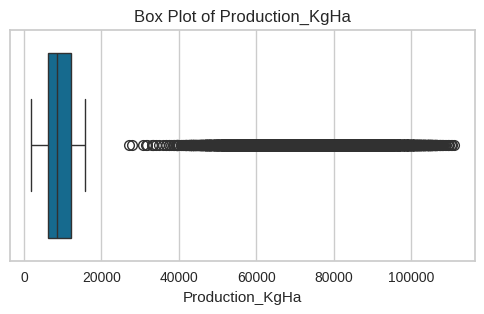

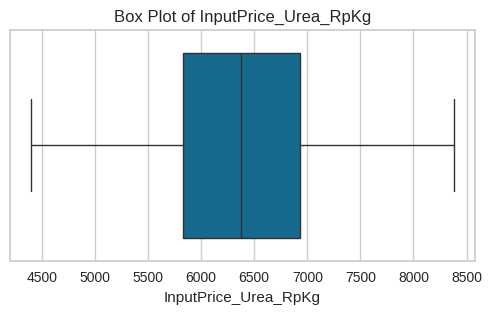

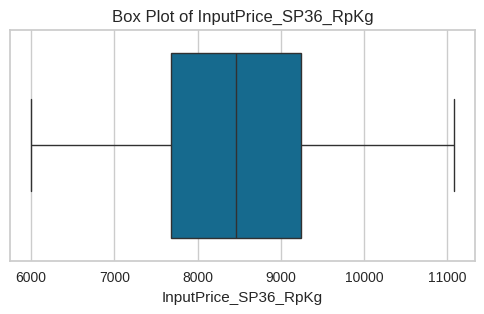

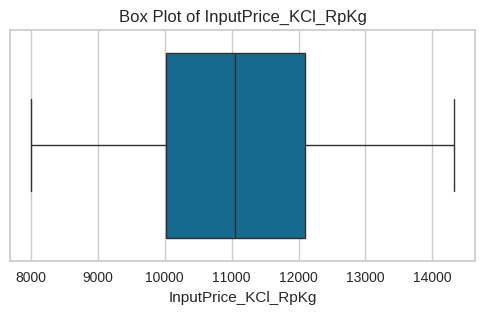

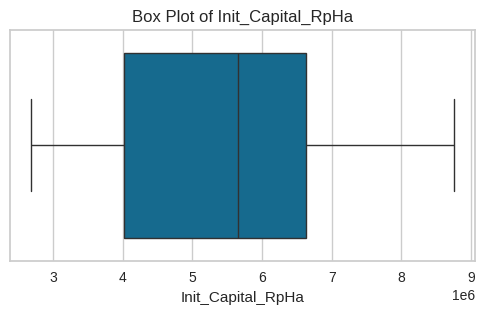

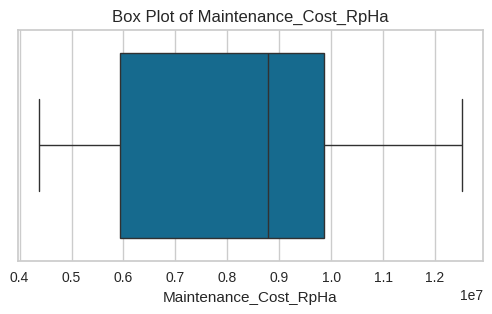

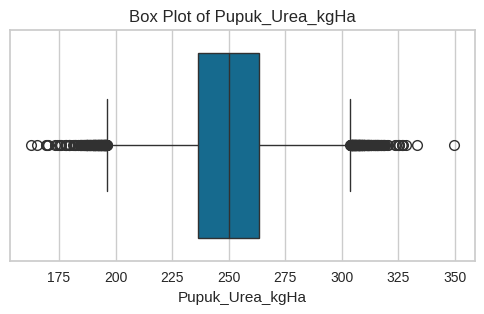

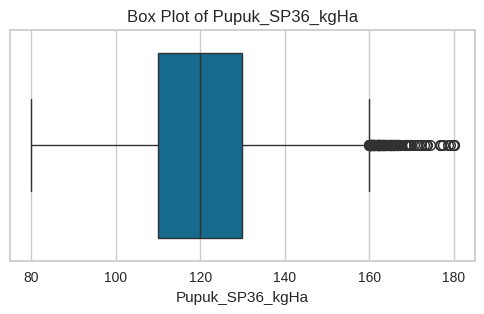

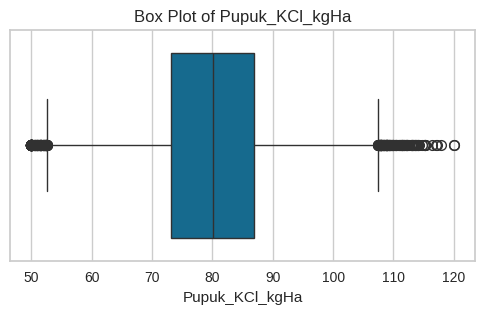

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_features = df.select_dtypes(include='number').columns
# Boxplot sebelum scaling
for feature in numeric_features:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()


In [9]:
#Penanganan Outliers
# membersihkan kategori supaya konsisten
df["Commodity"] = df["Commodity"].astype(str).str.strip().str.title() #untuk kmoditas karena jika melakukan penghapusan outliers pada umumnya, terdapat komoditas yang hilang

# mengambil kolom numerik
numeric_features = df.select_dtypes(include=['float64','int64']).columns

# membuat dataframe kosong untuk menampung hasil
df_clean = pd.DataFrame()

# Loop untuk setiap komoditas
for komoditas, subset in df.groupby("Commodity"):
    # Hitung IQR untuk subset (komoditas tertentu)
    Q1 = subset[numeric_features].quantile(0.25)
    Q3 = subset[numeric_features].quantile(0.75)
    IQR = Q3 - Q1

    mask = ~((subset[numeric_features] < (Q1 - 3 * IQR)) |
             (subset[numeric_features] > (Q3 + 3 * IQR))).any(axis=1)


    df_clean = pd.concat([df_clean, subset[mask]])


In [10]:
# Standardisasi untuk fitur numerik
numeric_features = df_clean.select_dtypes(include=['int64','float64']).columns.difference(
    ["Province","District","Commodity"]
)

# Menyalin data agar df_clean tetap utuh
df_standardized = df_clean.copy()

# Standarisasi
scaler = StandardScaler()
df_standardized[numeric_features] = scaler.fit_transform(df_standardized[numeric_features])


In [11]:
#Mengonversi data kategorikal
#Mengambil kolom kategorikkal
categorical_cols = ["Province", "District", "Commodity"]

# Menggunakan dataset yang sudah distandarisasi
df_encoded = pd.get_dummies(df_standardized, columns=categorical_cols, drop_first=True)

print(df_encoded.head())
print(f"Jumlah kolom setelah encoding: {df_encoded.shape[1]}")

        Year   Rain_mm    Temp_C  Humidity_pct   Soil_pH  Soil_N_index  \
5  -1.098590 -1.993874  0.788597     -0.417776 -0.274136     -0.528625   
20 -0.661452 -0.490431 -0.000926     -2.299965  0.291318      0.485966   
21 -1.535728  1.085299  0.964047     -0.235628 -0.335266     -0.528625   
22 -1.535728 -1.397697  1.314947     -4.318765  2.812939      0.485966   
25  1.524238 -0.565115  0.964047     -1.586555 -0.121311     -0.528625   

    Soil_P_index  Soil_K_index   Area_Ha  Prev_Yield_KgHa  ...  \
5      -0.530123     -1.535366 -0.623472        -0.464980  ...   
20     -0.530123     -0.525258 -0.840306        -0.296539  ...   
21      0.484811     -0.525258 -0.888543        -0.464304  ...   
22     -0.530123      0.484849 -0.828597        -0.316284  ...   
25     -0.530123     -0.525258 -0.810801        -0.312417  ...   

    District_Tuban  District_Wajo  District_Wamena  District_Yahukimo  \
5            False          False            False              False   
20          

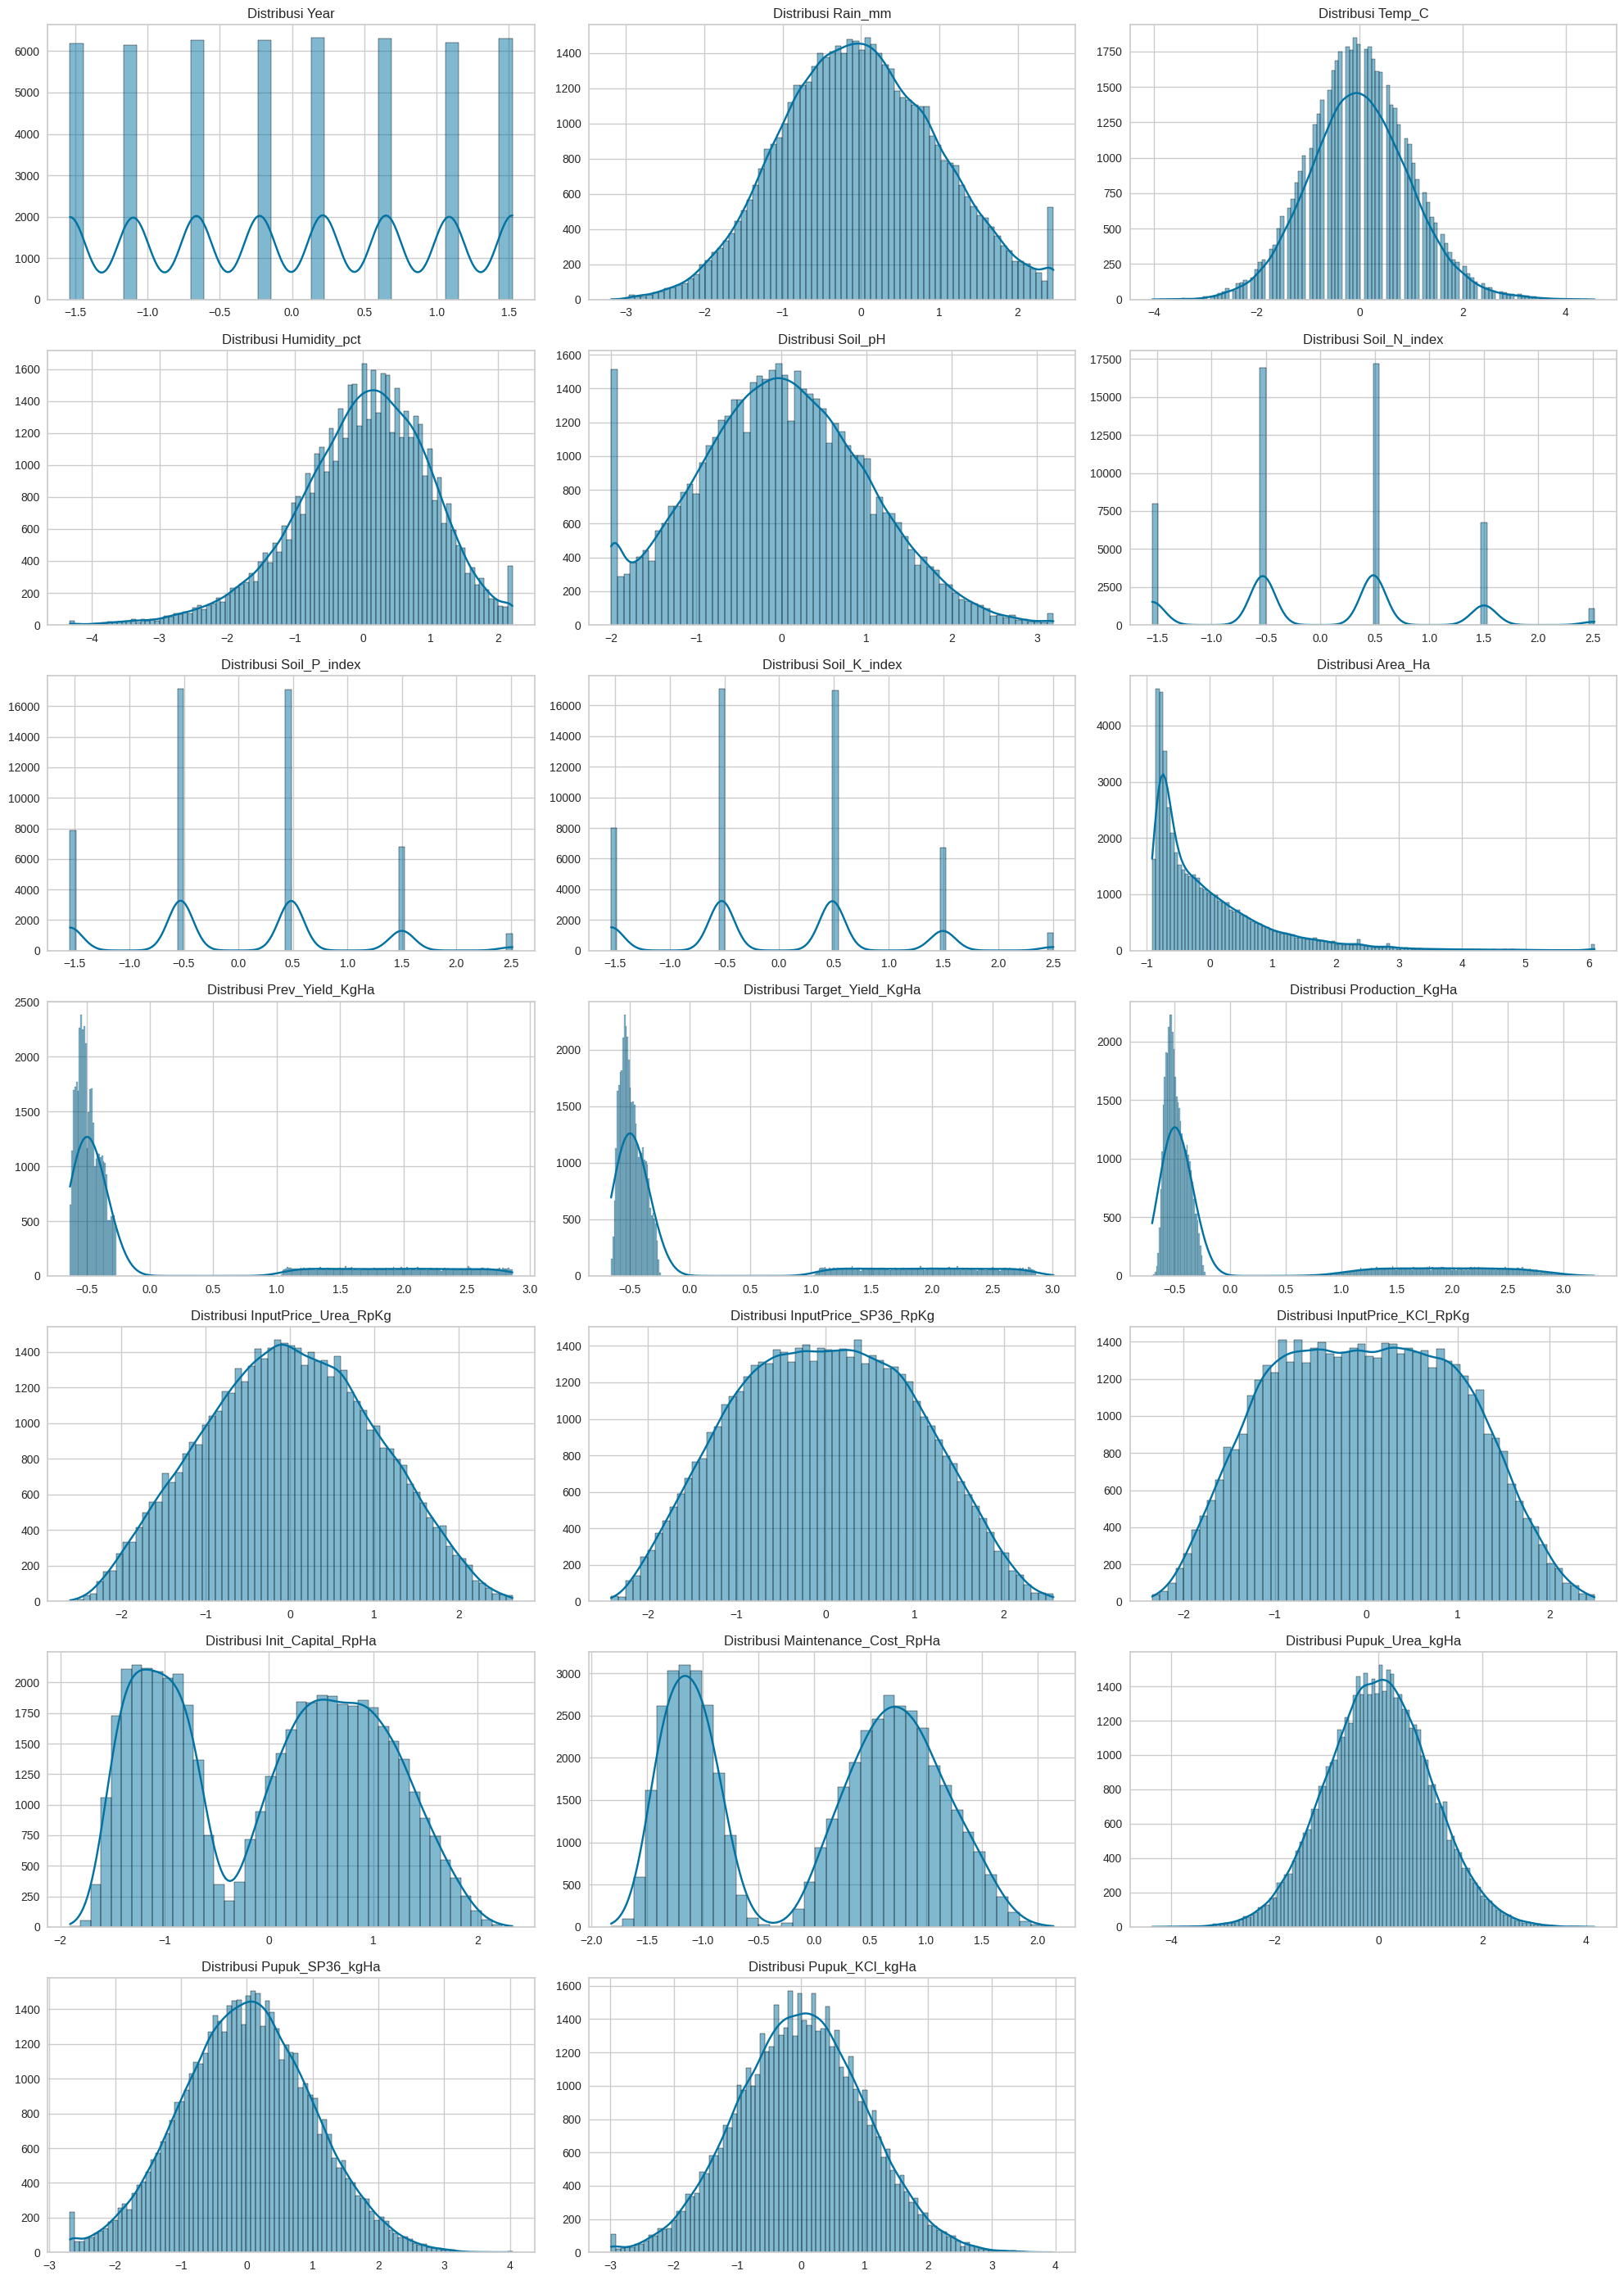

In [12]:
# Menghitung jumlah variabel
numeric_cols = df_encoded.select_dtypes(include=['float64','int64']).columns

# Menentukan jumlah baris dan kolom untuk grid subplot
num_vars = len(numeric_cols)
n_cols = 3  # Jumlah kolom yang diinginkan
n_rows =-(-num_vars // n_cols)

# Membuat subplot
plt.figure(figsize=(20, n_rows * 4))


# Plot setiap variabel
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df_encoded[col], kde=True)
    plt.title(f"Distribusi {col}")
    plt.xlabel("")
    plt.ylabel("")

# Menyesuaikan layout agar lebih rapi
plt.tight_layout()
plt.show()


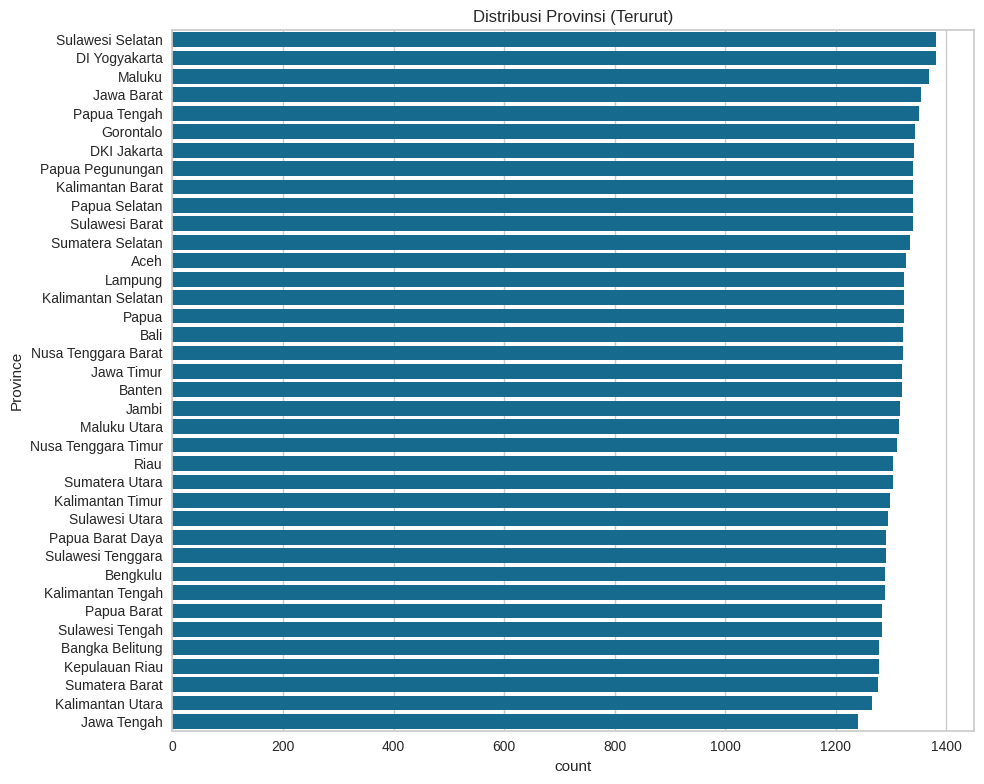

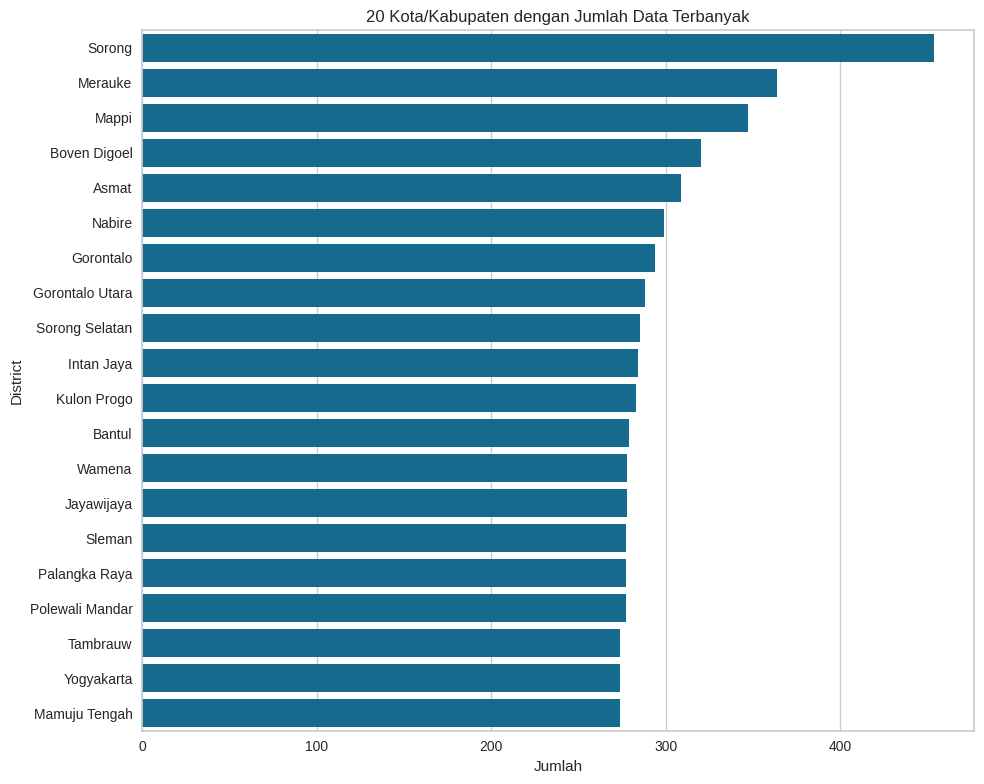

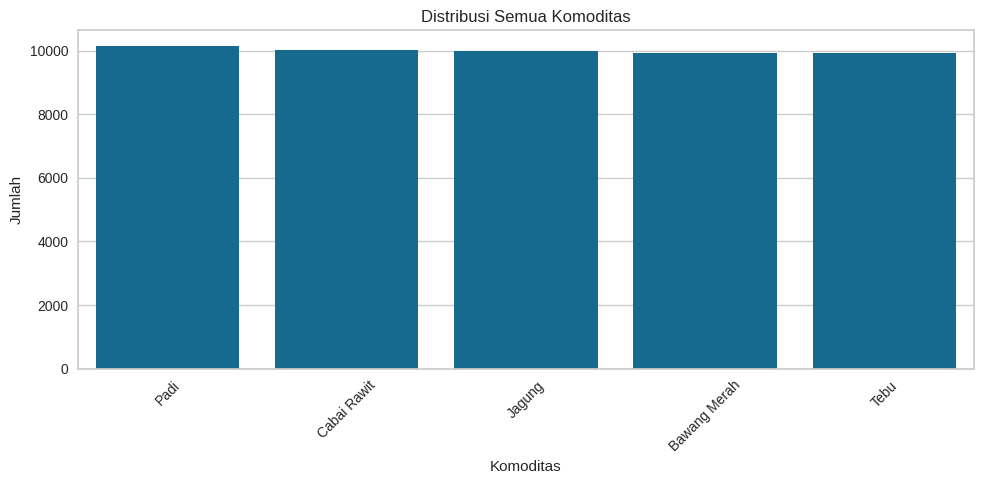

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengurutkan distribusi provinsi
plt.figure(figsize=(10,8))
sns.countplot(y="Province", data=df, order=df["Province"].value_counts().index)
plt.title("Distribusi Provinsi (Terurut)")
plt.tight_layout()
plt.show()

# Menampilkan 20 kota dengan jumlah data terbanyak
top_districts = df["District"].value_counts().head(20)

plt.figure(figsize=(10,8))
sns.barplot(x=top_districts.values, y=top_districts.index)
plt.title("20 Kota/Kabupaten dengan Jumlah Data Terbanyak")
plt.xlabel("Jumlah")
plt.ylabel("District")
plt.tight_layout()
plt.show()

# Menampilkan semua distribusi komoditas
plt.figure(figsize=(10,5))
sns.countplot(x="Commodity", data=df, order=df["Commodity"].value_counts().index)
plt.title("Distribusi Semua Komoditas")
plt.xlabel("Komoditas")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)  # miringkan label agar tidak tumpang tindih
plt.tight_layout()
plt.show()


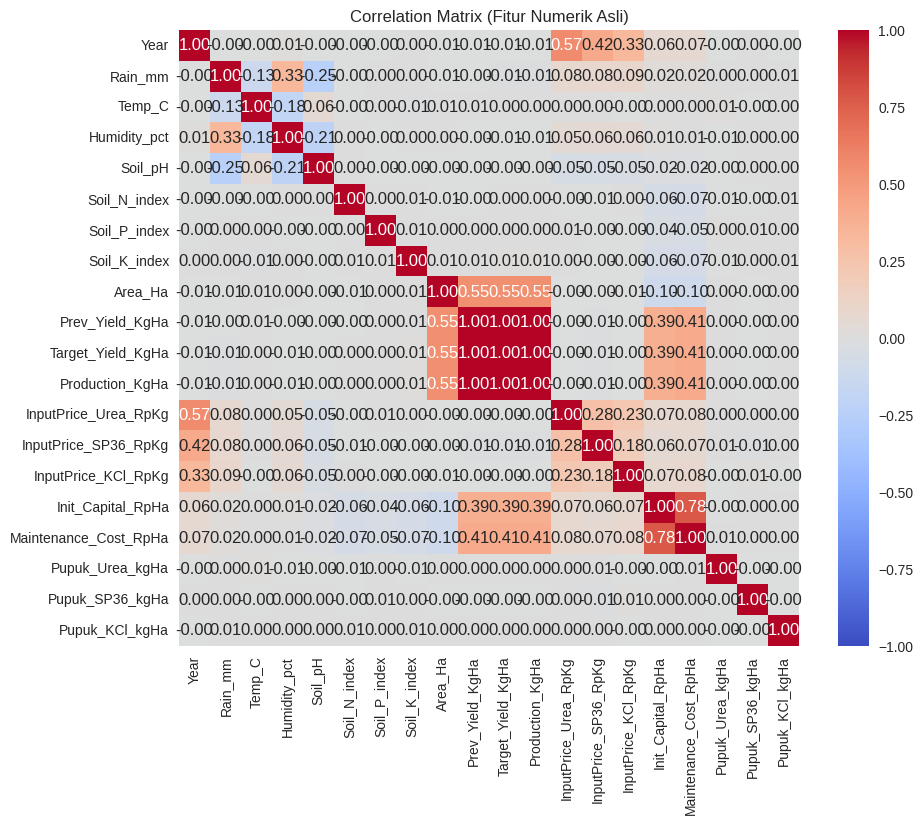

In [14]:
# Visualisasi korelasi antar variabel numerik
numeric_cols = df_standardized.select_dtypes(include=['float64','int64']).columns
correlation_matrix = df_standardized[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix (Fitur Numerik Asli)')
plt.show()



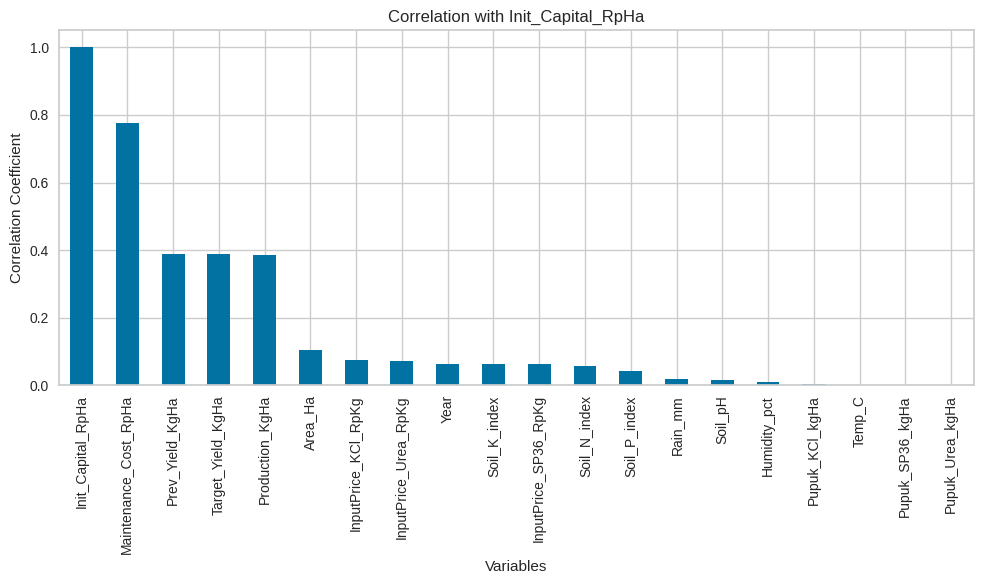

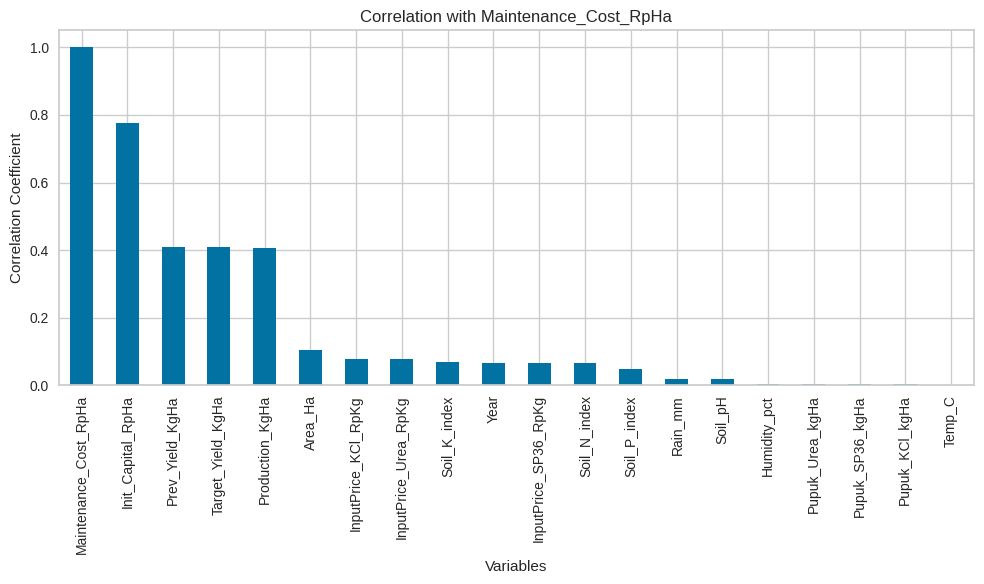

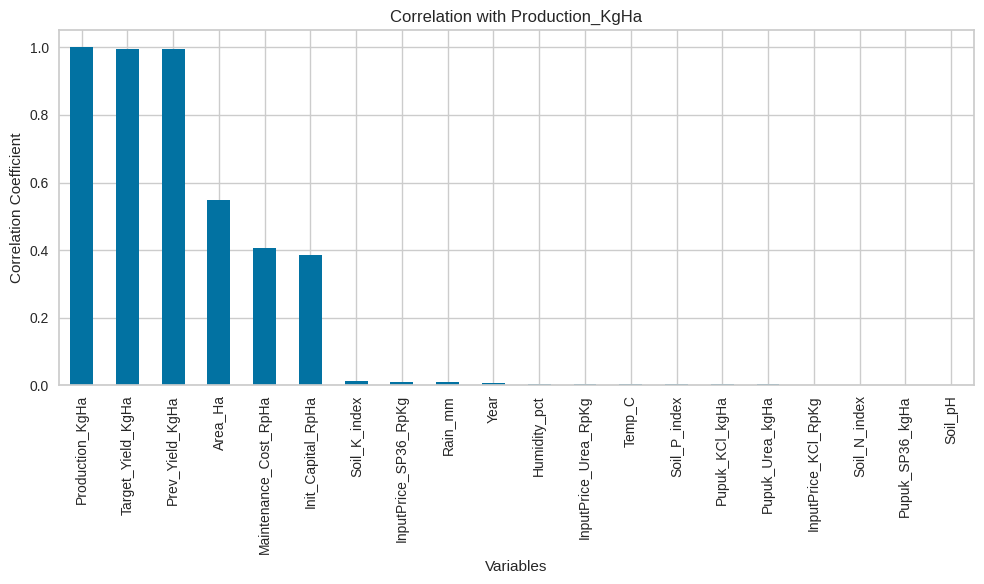

In [15]:
# Menghitung korelasi antara variabel target dan semua variabel lainnya
import matplotlib.pyplot as plt

# Hanya mengambil kolom numerik
numeric_df = df_standardized.select_dtypes(include=['float64','int64'])

target_cols = ["Init_Capital_RpHa", "Maintenance_Cost_RpHa", "Production_KgHa"]

for target in target_cols:
    target_corr = numeric_df.corr()[target]  # hitung korelasi terhadap target
    target_corr_sorted = target_corr.abs().sort_values(ascending=False)

    plt.figure(figsize=(10, 6))
    target_corr_sorted.plot(kind='bar')
    plt.title(f'Correlation with {target}')
    plt.xlabel('Variables')
    plt.ylabel('Correlation Coefficient')
    plt.tight_layout()
    plt.show()


Feature Engineering


In [16]:
#Fitur interaksi
# Contoh: Menghitung rasio hasil per luas lahan
df_encoded["Yield_per_Area"] = df_encoded["Production_KgHa"] / (df_encoded["Area_Ha"] + 1e-6)

# Biaya per produksi (Cost Efficiency)
df_encoded["Cost_per_Kg"] = (df_encoded["Init_Capital_RpHa"] + df_encoded["Maintenance_Cost_RpHa"]) / (df_encoded["Production_KgHa"] + 1e-6)

# Harga pupuk rata-rata
df_encoded["Avg_Fertilizer_Price"] = (
    df_encoded["InputPrice_Urea_RpKg"] + df_encoded["InputPrice_SP36_RpKg"] + df_encoded["InputPrice_KCl_RpKg"]
) / 3


In [17]:
#Fitur Polinomial
# Kuadratkan variabel yang punya distribusi simetris (misalnya pH atau Curah Hujan)
df_encoded["Soil_pH_sq"] = df_encoded["Soil_pH"] ** 2
df_encoded["Rain_mm_log"] = np.log1p(df_encoded["Rain_mm"] - df_encoded["Rain_mm"].min() + 1)


In [18]:
#Fitur Temporal
# Jarak tahun terhadap tahun awal
df_encoded["Year_Offset"] = df_encoded["Year"] - df_encoded["Year"].min()

# Trend Produksi (perubahan tahun-ke-tahun per komoditas)
df_encoded["Production_Trend"] = df_encoded.groupby("Commodity_Padi")["Production_KgHa"].diff().fillna(0)


In [19]:
#Fitur Klasifikasi Berdasarkan THreshold
# Kategori kesuburan tanah berdasarkan pH
df_encoded["Soil_pH_Category"] = pd.cut(
    df_encoded["Soil_pH"],
    bins=[-np.inf, -0.5, 0.5, np.inf],
    labels=["Low", "Optimal", "High"]
)

# Kategori curah hujan
df_encoded["Rain_Category"] = pd.qcut(df_encoded["Rain_mm"], q=4, labels=["Very Low", "Low", "Medium", "High"])


Data Splitting

In [20]:
# Tentukan target kolom
target_cols = ["Init_Capital_RpHa", "Maintenance_Cost_RpHa", "Production_KgHa"]

# Pisahkan X (fitur) dan y (target)
X = df_encoded.drop(columns=target_cols)
y = df_encoded[target_cols]

In [21]:
#One-Hot Encoding untuk kolom kategorikal
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)


In [22]:
# membaagi dataset menjadi train (80%) dan test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

In [23]:
print("Ukuran dataset:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

Ukuran dataset:
X_train: (39995, 306)
X_test: (9999, 306)
y_train: (39995, 3)
y_test: (9999, 3)


Training Model

In [29]:
#Training RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

rf_models = {}
rf_results = {}

for col in target_cols:
    model = RandomForestRegressor(n_estimators=200, random_state=42)
    model.fit(X_train, y_train[col])
    y_pred = model.predict(X_test)

    rf_models[col] = model
    rf_results[col] = {
        "R2": r2_score(y_test[col], y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test[col], y_pred))  # hitung manual
    }

print("Hasil RandomForestRegressor")
for col, res in rf_results.items():
    print(f"{col}: R² = {res['R2']:.3f}, RMSE = {res['RMSE']:.3f}")


Hasil RandomForestRegressor
Init_Capital_RpHa: R² = 0.916, RMSE = 0.292
Maintenance_Cost_RpHa: R² = 0.942, RMSE = 0.241
Production_KgHa: R² = 0.994, RMSE = 0.075


In [32]:
#Training dan evaluasi XGBoost
from xgboost import XGBRegressor

xgb_models = {}
xgb_results = {}

for col in target_cols:
    model = XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        random_state=42
    )
    model.fit(X_train, y_train[col])
    y_pred = model.predict(X_test)

    xgb_models[col] = model
    xgb_results[col] = {
        "R2": r2_score(y_test[col], y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test[col], y_pred))
    }

print("Hasil XGBoostRegressor")
for col, res in xgb_results.items():
    print(f"{col}: R² = {res['R2']:.3f}, RMSE = {res['RMSE']:.3f}")


Hasil XGBoostRegressor
Init_Capital_RpHa: R² = 0.927, RMSE = 0.271
Maintenance_Cost_RpHa: R² = 0.952, RMSE = 0.217
Production_KgHa: R² = 0.996, RMSE = 0.064


In [33]:
#Membandingkan performa kedua model
compare_df = pd.DataFrame({
    "RandomForest_R2": {k: v["R2"] for k, v in rf_results.items()},
    "XGBoost_R2": {k: v["R2"] for k, v in xgb_results.items()},
    "RandomForest_RMSE": {k: v["RMSE"] for k, v in rf_results.items()},
    "XGBoost_RMSE": {k: v["RMSE"] for k, v in xgb_results.items()},
})

print(compare_df)


                       RandomForest_R2  XGBoost_R2  RandomForest_RMSE  \
Init_Capital_RpHa             0.915824    0.927388           0.291522   
Maintenance_Cost_RpHa         0.941504    0.952440           0.240842   
Production_KgHa               0.994141    0.995843           0.075464   

                       XGBoost_RMSE  
Init_Capital_RpHa          0.270758  
Maintenance_Cost_RpHa      0.217166  
Production_KgHa            0.063565  


In [34]:

ensemble_results = {}
for col in target_cols:
    rf_pred = rf_models[col].predict(X_test)
    xgb_pred = xgb_models[col].predict(X_test)
    ensemble_pred = (rf_pred + xgb_pred) / 2

    ensemble_results[col] = {
        "R2": r2_score(y_test[col], ensemble_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test[col], ensemble_pred))
    }

ensemble_df = pd.DataFrame(ensemble_results).T
print(ensemble_df)



                             R2      RMSE
Init_Capital_RpHa      0.923958  0.277079
Maintenance_Cost_RpHa  0.949021  0.224836
Production_KgHa        0.995238  0.068029


In [35]:
import joblib

for col in target_cols:
    joblib.dump(rf_models[col], f'rf_baseline_{col}.pkl')
    joblib.dump(xgb_models[col], f'xgb_baseline_{col}.pkl')

print("Semua model baseline berhasil disimpan!")


Semua model baseline berhasil disimpan!


Hyperparameter

In [44]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Definisikan parameter yang akan di-tuning
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

rf_best_models = {}
rf_best_params = {}
rf_best_scores = {}

# Target yang ingin diprediksi
target_cols = ['Production_KgHa', 'Init_Capital_RpHa', 'Maintenance_Cost_RpHa']

for col in target_cols:
    print(f"\n Hyperparameter tuning RandomForest untuk target: {col}")
    rf_random_search = RandomizedSearchCV(
        estimator=RandomForestRegressor(random_state=42),
        param_distributions=rf_param_grid,
        n_iter=5,
        cv=3,
        scoring='r2',
        random_state=42,
        n_jobs=-1,
        verbose=1
    )
    rf_random_search.fit(X_train, y_train[col])
    rf_best_models[col] = rf_random_search.best_estimator_
    rf_best_params[col] = rf_random_search.best_params_
    rf_best_scores[col] = rf_random_search.best_score_

    print(f"Best Parameters ({col}): {rf_random_search.best_params_}")
    print(f"Best R² (CV) ({col}): {rf_random_search.best_score_:.3f}")


 Hyperparameter tuning RandomForest untuk target: Production_KgHa
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Parameters (Production_KgHa): {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 5}
Best R² (CV) (Production_KgHa): 0.993

 Hyperparameter tuning RandomForest untuk target: Init_Capital_RpHa
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Parameters (Init_Capital_RpHa): {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 5}
Best R² (CV) (Init_Capital_RpHa): 0.878

 Hyperparameter tuning RandomForest untuk target: Maintenance_Cost_RpHa
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Parameters (Maintenance_Cost_RpHa): {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None}
Best R² (CV) (Maintenance_Cost_RpHa): 0.915


In [45]:
# Melatih ulang semua model terbaik Random Forest untuk tiap target
for col in target_cols:
    print(f"Melatih ulang model terbaik Random Forest untuk target: {col}")
    rf_best_models[col].fit(X_train, y_train[col])



Melatih ulang model terbaik Random Forest untuk target: Production_KgHa
Melatih ulang model terbaik Random Forest untuk target: Init_Capital_RpHa
Melatih ulang model terbaik Random Forest untuk target: Maintenance_Cost_RpHa


In [47]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import numpy as np
import pandas as pd
import joblib

#  Definisikan parameter grid untuk XGBoost

xgb_param_grid = {
    'n_estimators': [100, 200, 300],          # jumlah pohon
    'learning_rate': [0.01, 0.05, 0.1],       # laju pembelajaran
    'max_depth': [3, 5, 7],                   # kedalaman pohon
    'subsample': [0.6, 0.8, 1.0],             # proporsi data yang dipakai tiap pohon
    'colsample_bytree': [0.6, 0.8, 1.0],      # proporsi fitur tiap pohon
    'gamma': [0, 0.1, 0.3]                    # regularisasi
}

# Inisialisasi dictionary untuk menyimpan hasil tuning

xgb_best_models = {}
xgb_best_params = {}
xgb_best_scores = {}

# Tentukan kolom target yang ingin diprediksi

print("Kolom target yang tersedia di y_train:", list(y_train.columns))

target_cols = ['Production_KgHa', 'Init_Capital_RpHa', 'Maintenance_Cost_RpHa']

#  Looping untuk tuning masing-masing target

for col in target_cols:
    if col not in y_train.columns:
        print(f" Kolom '{col}' tidak ditemukan di y_train, dilewati...")
        continue

    print(f"\n Hyperparameter tuning XGBoost untuk target: {col}")

    # Setup RandomizedSearch
    xgb_random_search = RandomizedSearchCV(
        estimator=XGBRegressor(
            random_state=42,
            objective='reg:squarederror',
            tree_method='hist'
        ),
        param_distributions=xgb_param_grid,
        n_iter=5,
        cv=3,
        scoring='r2',       # evaluasi berdasarkan R²
        random_state=42,
        n_jobs=-1,
        verbose=1
    )

    # Jalankan tuning
    xgb_random_search.fit(X_train, y_train[col])

    # Simpan hasil terbaik
    xgb_best_models[col] = xgb_random_search.best_estimator_
    xgb_best_params[col] = xgb_random_search.best_params_
    xgb_best_scores[col] = xgb_random_search.best_score_

    print(f" Best Parameters ({col}): {xgb_random_search.best_params_}")
    print(f" Best R² (CV) ({col}): {xgb_random_search.best_score_:.3f}")



Kolom target yang tersedia di y_train: ['Init_Capital_RpHa', 'Maintenance_Cost_RpHa', 'Production_KgHa']

 Hyperparameter tuning XGBoost untuk target: Production_KgHa
Fitting 3 folds for each of 5 candidates, totalling 15 fits
 Best Parameters (Production_KgHa): {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.6}
 Best R² (CV) (Production_KgHa): 0.996

 Hyperparameter tuning XGBoost untuk target: Init_Capital_RpHa
Fitting 3 folds for each of 5 candidates, totalling 15 fits
 Best Parameters (Init_Capital_RpHa): {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.6}
 Best R² (CV) (Init_Capital_RpHa): 0.925

 Hyperparameter tuning XGBoost untuk target: Maintenance_Cost_RpHa
Fitting 3 folds for each of 5 candidates, totalling 15 fits
 Best Parameters (Maintenance_Cost_RpHa): {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0, 'cols

In [48]:
# Melatih ulang semua model hasil tuning XGBoost
for col in target_cols:
    print(f"Melatih ulang model XGBoost terbaik untuk target: {col}")
    xgb_best_models[col].fit(X_train, y_train[col])


Melatih ulang model XGBoost terbaik untuk target: Production_KgHa
Melatih ulang model XGBoost terbaik untuk target: Init_Capital_RpHa
Melatih ulang model XGBoost terbaik untuk target: Maintenance_Cost_RpHa


In [49]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

results = []  # untuk menyimpan semua hasil evaluasi

print("Evaluasi Model untuk Semua Target\n")

for col in target_cols:
    print(f"Evaluasi Model untuk Target: {col}")

    # Prediksi Random Forest
    y_pred_rf = rf_best_models[col].predict(X_test)
    mse_rf = mean_squared_error(y_test[col], y_pred_rf)
    rmse_rf = np.sqrt(mse_rf)
    r2_rf = r2_score(y_test[col], y_pred_rf)

    # Prediksi XGBoost
    y_pred_xgb = xgb_best_models[col].predict(X_test)
    mse_xgb = mean_squared_error(y_test[col], y_pred_xgb)
    rmse_xgb = np.sqrt(mse_xgb)
    r2_xgb = r2_score(y_test[col], y_pred_xgb)

    # Cetak hasil per target
    print(f"   Random Forest → MSE: {mse_rf:.4f}, RMSE: {rmse_rf:.4f}, R²: {r2_rf:.4f}")
    print(f"   XGBoost       → MSE: {mse_xgb:.4f}, RMSE: {rmse_xgb:.4f}, R²: {r2_xgb:.4f}\n")

    # Simpan hasil ke list
    results.append({
        "Target": col,
        "RF_R2": r2_rf,
        "RF_RMSE": rmse_rf,
        "XGB_R2": r2_xgb,
        "XGB_RMSE": rmse_xgb
    })

# Buat DataFrame hasil
results_df = pd.DataFrame(results)

print("\nRingkasan Hasil Evaluasi:")
print(results_df.round(4))

# Simpan ke file CSV
results_df.to_csv("model_evaluation_results.csv", index=False)
print("\nHasil evaluasi disimpan dalam file 'model_evaluation_results.csv'")


Evaluasi Model untuk Semua Target

Evaluasi Model untuk Target: Production_KgHa
   Random Forest → MSE: 0.0076, RMSE: 0.0874, R²: 0.9921
   XGBoost       → MSE: 0.0039, RMSE: 0.0624, R²: 0.9960

Evaluasi Model untuk Target: Init_Capital_RpHa
   Random Forest → MSE: 0.1223, RMSE: 0.3497, R²: 0.8789
   XGBoost       → MSE: 0.0712, RMSE: 0.2669, R²: 0.9295

Evaluasi Model untuk Target: Maintenance_Cost_RpHa
   Random Forest → MSE: 0.0830, RMSE: 0.2881, R²: 0.9163
   XGBoost       → MSE: 0.0424, RMSE: 0.2060, R²: 0.9572


Ringkasan Hasil Evaluasi:
                  Target   RF_R2  RF_RMSE  XGB_R2  XGB_RMSE
0        Production_KgHa  0.9921   0.0874  0.9960    0.0624
1      Init_Capital_RpHa  0.8789   0.3497  0.9295    0.2669
2  Maintenance_Cost_RpHa  0.9163   0.2881  0.9572    0.2060

Hasil evaluasi disimpan dalam file 'model_evaluation_results.csv'


In [50]:
import joblib

# Simpan semua model terbaik untuk tiap target
for col in target_cols:
    nama_file_rf = f"random_forest_model_{col}.pkl"
    nama_file_xgb = f"xgboost_model_{col}.pkl"

    joblib.dump(rf_best_models[col], nama_file_rf)
    joblib.dump(xgb_best_models[col], nama_file_xgb)

    print(f"Model Random Forest untuk {col} telah disimpan sebagai: {nama_file_rf}")
    print(f"Model XGBoost untuk {col} telah disimpan sebagai: {nama_file_xgb}\n")


Model Random Forest untuk Production_KgHa telah disimpan sebagai: random_forest_model_Production_KgHa.pkl
Model XGBoost untuk Production_KgHa telah disimpan sebagai: xgboost_model_Production_KgHa.pkl

Model Random Forest untuk Init_Capital_RpHa telah disimpan sebagai: random_forest_model_Init_Capital_RpHa.pkl
Model XGBoost untuk Init_Capital_RpHa telah disimpan sebagai: xgboost_model_Init_Capital_RpHa.pkl

Model Random Forest untuk Maintenance_Cost_RpHa telah disimpan sebagai: random_forest_model_Maintenance_Cost_RpHa.pkl
Model XGBoost untuk Maintenance_Cost_RpHa telah disimpan sebagai: xgboost_model_Maintenance_Cost_RpHa.pkl



Model Rekomendasi

In [64]:
# Import library yang dibutuhkan untuk model rekomendasi
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import joblib

# Pilih fitur yang relevan untuk rekomendasi pupuk
# Fitur-fitur ini paling berpengaruh terhadap jenis dan jumlah pupuk yang dibutuhkan
features_rekomendasi = [
    'Soil_N_index', 'Soil_P_index', 'Soil_K_index',
    'Soil_pH', 'Temp_C', 'Rain_mm', 'Humidity_pct'
]

# Tentukan variabel target (jenis pupuk)
targets_rekomendasi = ['Pupuk_Urea_kgHa', 'Pupuk_SP36_kgHa', 'Pupuk_KCl_kgHa']

# Pisahkan data fitur dan target
X_rekomendasi = df[features_rekomendasi]
y_rekomendasi = df[targets_rekomendasi]

# Buat pipeline untuk preprocessing dan model
# StandardScaler akan menormalisasi data, dan KNeighborsRegressor akan mencari "tetangga" terdekat
# untuk memberikan rekomendasi.
pipeline_rekomendasi = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=5)) # n_neighbors=5 berarti model akan mencari 5 data paling mirip
])






In [65]:
# Latih model
print("Melatih model rekomendasi pupuk...")
pipeline_rekomendasi.fit(X_rekomendasi, y_rekomendasi)
print("Model rekomendasi pupuk berhasil dilatih.")



Melatih model rekomendasi pupuk...
Model rekomendasi pupuk berhasil dilatih.


In [66]:
# Simpan model yang sudah dilatih ke dalam file
nama_file_rekomendasi = 'model_rekomendasi_pupuk.pkl'
joblib.dump(pipeline_rekomendasi, nama_file_rekomendasi)

print(f"Model rekomendasi pupuk telah disimpan dalam file: {nama_file_rekomendasi}")

Model rekomendasi pupuk telah disimpan dalam file: model_rekomendasi_pupuk.pkl


In [67]:
# Contoh cara menggunakan model untuk prediksi (rekomendasi)
contoh_input = pd.DataFrame({
    'Soil_N_index': [3],
    'Soil_P_index': [2],
    'Soil_K_index': [3],
    'Soil_pH': [5.5],
    'Temp_C': [27],
    'Rain_mm': [2000],
    'Humidity_pct': [80]
})

rekomendasi_pupuk = pipeline_rekomendasi.predict(contoh_input)
print("\nContoh Rekomendasi:")
print(f"Pupuk Urea: {rekomendasi_pupuk[0][0]:.2f} kg/Ha")
print(f"Pupuk SP36: {rekomendasi_pupuk[0][1]:.2f} kg/Ha")
print(f"Pupuk KCl: {rekomendasi_pupuk[0][2]:.2f} kg/Ha")


Contoh Rekomendasi:
Pupuk Urea: 242.86 kg/Ha
Pupuk SP36: 119.82 kg/Ha
Pupuk KCl: 81.52 kg/Ha
